# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [4]:
def bayes_rule(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

In [8]:
priors = [1/2,1/2]
likelihoods = [0.75,0.5]

In [9]:
bayes_rule(priors, likelihoods)

array([0.6, 0.4])

In [ ]:
#Hay un 60% de probabilidad de tomar una galleta de vainilla 

What is the probability that it came from Bowl 2?

In [ ]:
#Es de un 40%

What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [14]:
priors = [1/2,1/2]
likelihoods = [0.25,0.5]

In [15]:
bayes_rule(priors, likelihoods)

array([1.])

In [13]:
#Un 33% de probabilidad en el Bowl 1 y un 66% en el Bowl 2

## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [182]:

priors = [1/2,1/2]
likelihoods = [0.2*0.2,.14*0.1]

In [183]:
def bayes_rule(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

In [184]:
bayes_rule(priors, likelihoods)

array([0.74074074, 0.25925926])

In [57]:
#Haciendolo paso por paso 
## P(A|B) = P((B|A)*P(A)) / P(B)
p_A=0.25#elijiendo entre las 4 posibilades de escoger la bolsa bolsas 
p_BA= 0.2*0.2#probabilidad de tomar un dulce amarillo en la bolsa 1
p_AA=0.14*0.1#probabilidad de tomar un dulce amarillo en la bosa 2 (caso contrario)
p_B= (0.25*p_BA)+(p_AA*0.25)#Probabilidad de los datos bajo la hipótesis 

In [58]:
p_AB=(p_A*p_BA)/p_B
p_AB

0.7407407407407408

What is the probability that the yellow candy came from Bag 2?

In [ ]:
#La probabilidad es de 74% 

What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [185]:

priors = [1/2,1/2]
likelihoods = [0.1,.2]

In [186]:
def bayes_rule(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

In [187]:
bayes_rule(priors, likelihoods)

array([0.33333333, 0.66666667])

In [25]:
#De la bolsa 1 hay un 33% y de la bolsa 2 hay un 66%

## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [123]:
priors = [1/3,1/3,1/3]
likelihoods = [.5*.5,.5*.5,.5*.5]

In [124]:
def bayes_rule(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

In [125]:
bayes_rule(priors, likelihoods)

array([0.33333333, 0.33333333, 0.33333333])

In [189]:
priors2 = [.33,.33]
likelihoods2 = [.5,1]

In [190]:
bayes_rule(priors2, likelihoods2)

array([0.33333333, 0.66666667])

In [200]:
#Haciendolo paso por paso 
p_A=1/3#elijiendo entre las dos bolsas 
p_BA= 1/2#probabilidad de encontrar el carro en la puerta 1
p_AA=1#probabilidad de encontrar el carro en la puesta 2 (caso contrario)
p_B= (p_A*p_BA)+(p_AA*p_A)#Probabilidad de los datos bajo la hipótesis 


In [199]:
p_AB=(p_A*p_BA)/p_B
p_AB

0.3333333333333333

In [202]:
p_AB=(p_AA*p_A)/p_B
p_AB

0.6666666666666666

## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

In [115]:
observed=14

In [116]:
def generative_model(param):
    result = np.random.binomial(100, param)
    return result

In [117]:
sim_data = list()

for p in prior:
    sim_data.append(generative_model(p))


In [118]:
posterior = prior[list(map(lambda x: x == observed, sim_data))]

<AxesSubplot:>

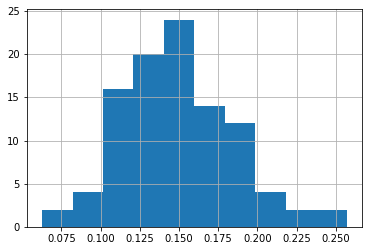

In [119]:
posterior.hist()

Produce a set of descriptive statistics for the posterior distribution.

In [120]:
posterior.describe()

count    100.000000
mean       0.148195
std        0.035721
min        0.062695
25%        0.123861
50%        0.146623
75%        0.169342
max        0.256919
dtype: float64

What is the 90% credible interval range?

In [121]:
print(posterior.quantile(.025), '|', posterior.quantile(.975))

0.08886772019062458 | 0.22371078433506927


What is the Maximum Likelihood Estimate?

In [122]:
rounded = posterior.round(2)
mode = rounded.mode()[0]
probability = list(rounded).count(mode)/len(rounded)
print('Maximum Likelihood Estimate: ', mode, '|',probability)

Maximum Likelihood Estimate:  0.12 | 0.12


In [ ]:
#https://colab.research.google.com/github/pedroteche-ih/DAFT_MEX_202209/blob/main/ML%20Workflow.ipynb